## Import



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn import preprocessing, svm
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, LogisticRegression, Perceptron
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV,
                                     train_test_split)
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler, OneHotEncoder,
                                   StandardScaler)
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

## Data Read

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv', header=None)

In [ ]:
df.rename(columns={0:'Native_English_Speaker', 1:'Course_Instructor', 2:'Course', 3:'Semester', 4:'Class_Size', 5:'Score'},inplace = True)

In [ ]:
df.head()

,Native_English_Speaker,Course_Instructor,Course,Semester,Class_Size,Score
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


## Data visualization

In [ ]:
df.info() # display information about the dataset
df.describe() # display summary statistics for numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Native_English_Speaker  151 non-null    int64
 1   Course_Instructor       151 non-null    int64
 2   Course                  151 non-null    int64
 3   Semester                151 non-null    int64
 4   Class_Size              151 non-null    int64
 5   Score                   151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


,Native_English_Speaker,Course_Instructor,Course,Semester,Class_Size,Score
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [ ]:
# print the unique values of the categorical features
print(df['Course_Instructor'].unique())
print(df['Course'].unique())

# print the count of each unique value in the categorical features
print(df['Course_Instructor'].value_counts())
print(df['Course'].value_counts())

[23 15  5  7  9 10 22 13 18  6 25  2  1  8 14 21 11 16  4 17 20 12 24  3
 19]
[ 3  2 11  5 22  1 21 17 25  7  9 15 13  8 16 19 14  6 12 18 23 26 24 20
  4 10]
23    17
13    14
22    12
7     11
9      8
10     8
18     8
6      8
15     8
14     8
5      6
20     5
8      5
16     4
17     4
1      4
2      4
25     4
11     3
21     2
4      2
12     2
3      2
24     1
19     1
Name: Course_Instructor, dtype: int64
3     45
2     16
1     14
15    10
17    10
11     9
7      7
5      5
8      4
25     3
9      3
21     3
13     3
22     3
16     3
18     2
6      2
14     1
12     1
19     1
23     1
26     1
24     1
20     1
4      1
10     1
Name: Course, dtype: int64


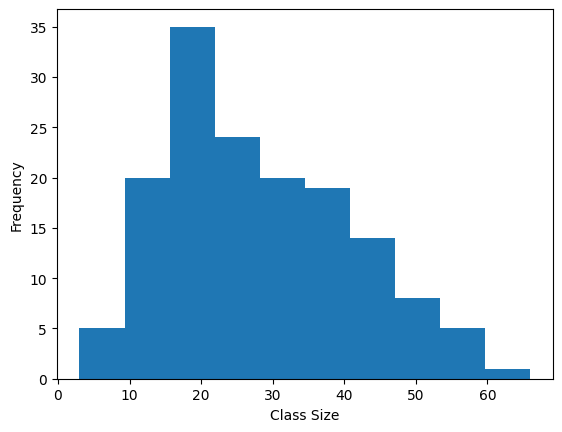

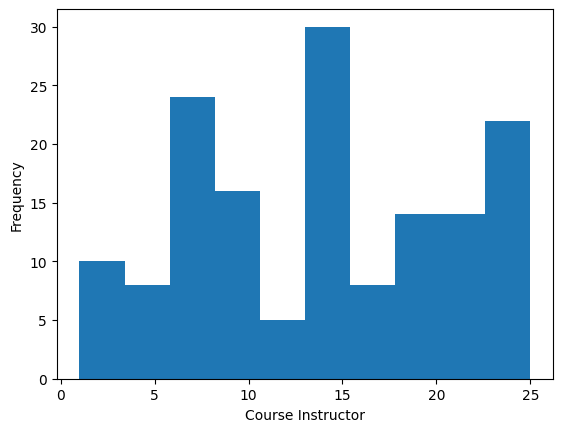

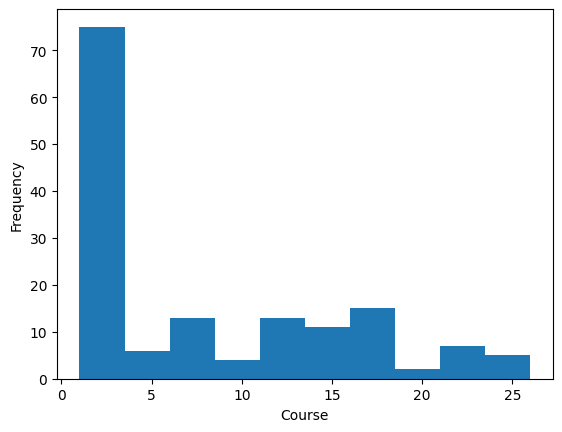

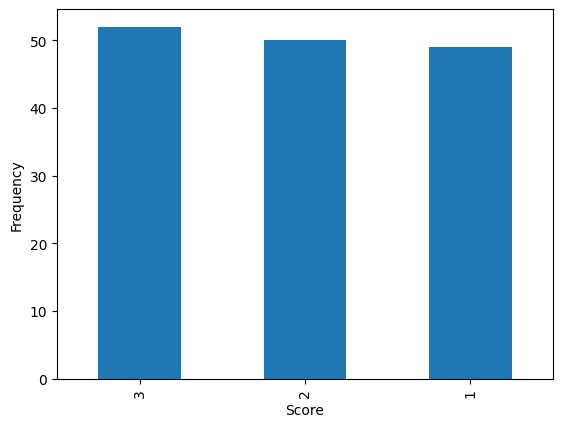

In [ ]:
# create a histogram of class size
plt.hist(df['Class_Size'])
plt.xlabel('Class Size')
plt.ylabel('Frequency')
plt.show()

# create a histogram of class size
plt.hist(df['Course_Instructor'])
plt.xlabel('Course Instructor')
plt.ylabel('Frequency')
plt.show()

# create a histogram of class size
plt.hist(df['Course'])
plt.xlabel('Course')
plt.ylabel('Frequency')
plt.show()

# create a bar chart of class attribute
df['Score'].value_counts().plot(kind='bar')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


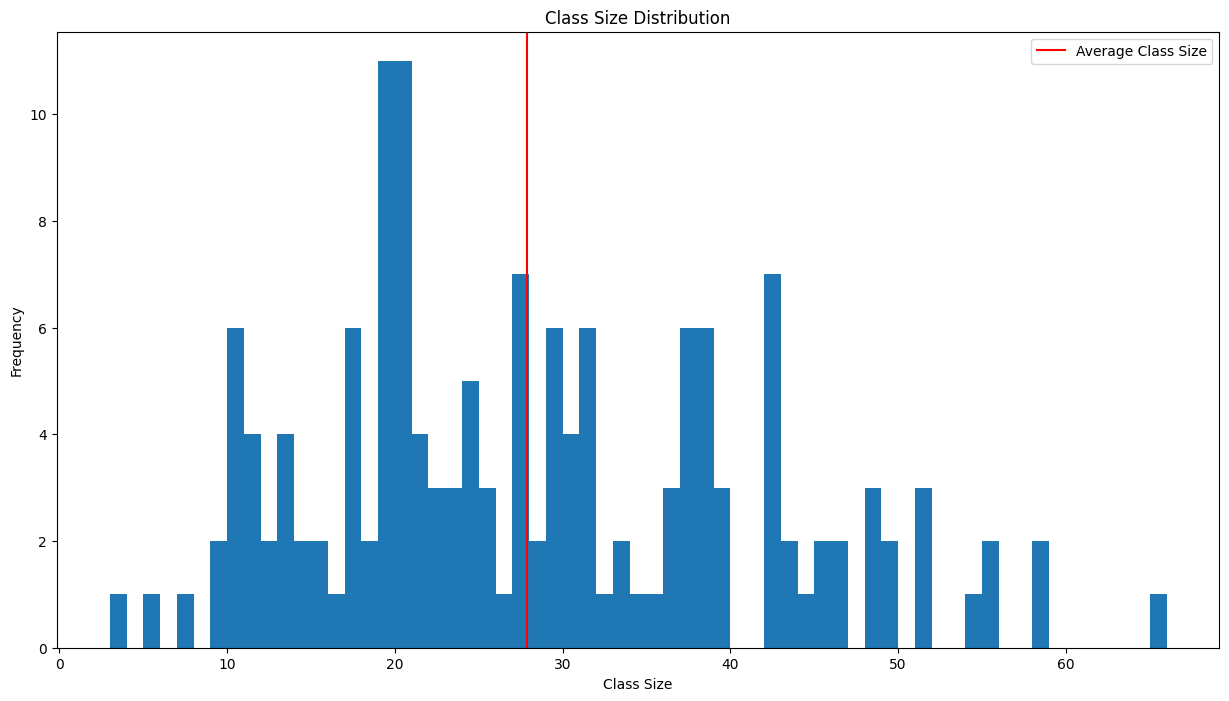

In [ ]:
# Find spread of class size values
spread = int(max(df.Class_Size) - min(df.Class_Size))

# Plot class size score histogram and its mean
plt.figure(figsize=(15,8))
plt.hist(df.Class_Size, bins=spread)
plt.axvline(df.Class_Size.mean(), color='r', label='Average Class Size')
plt.xlabel('Class Size')
plt.ylabel('Frequency')
plt.title('Class Size Distribution')
plt.legend()

Score
Index(['Native_English_Speaker', 'Course_Instructor', 'Course', 'Semester',
       'Class_Size'],
      dtype='object')
5


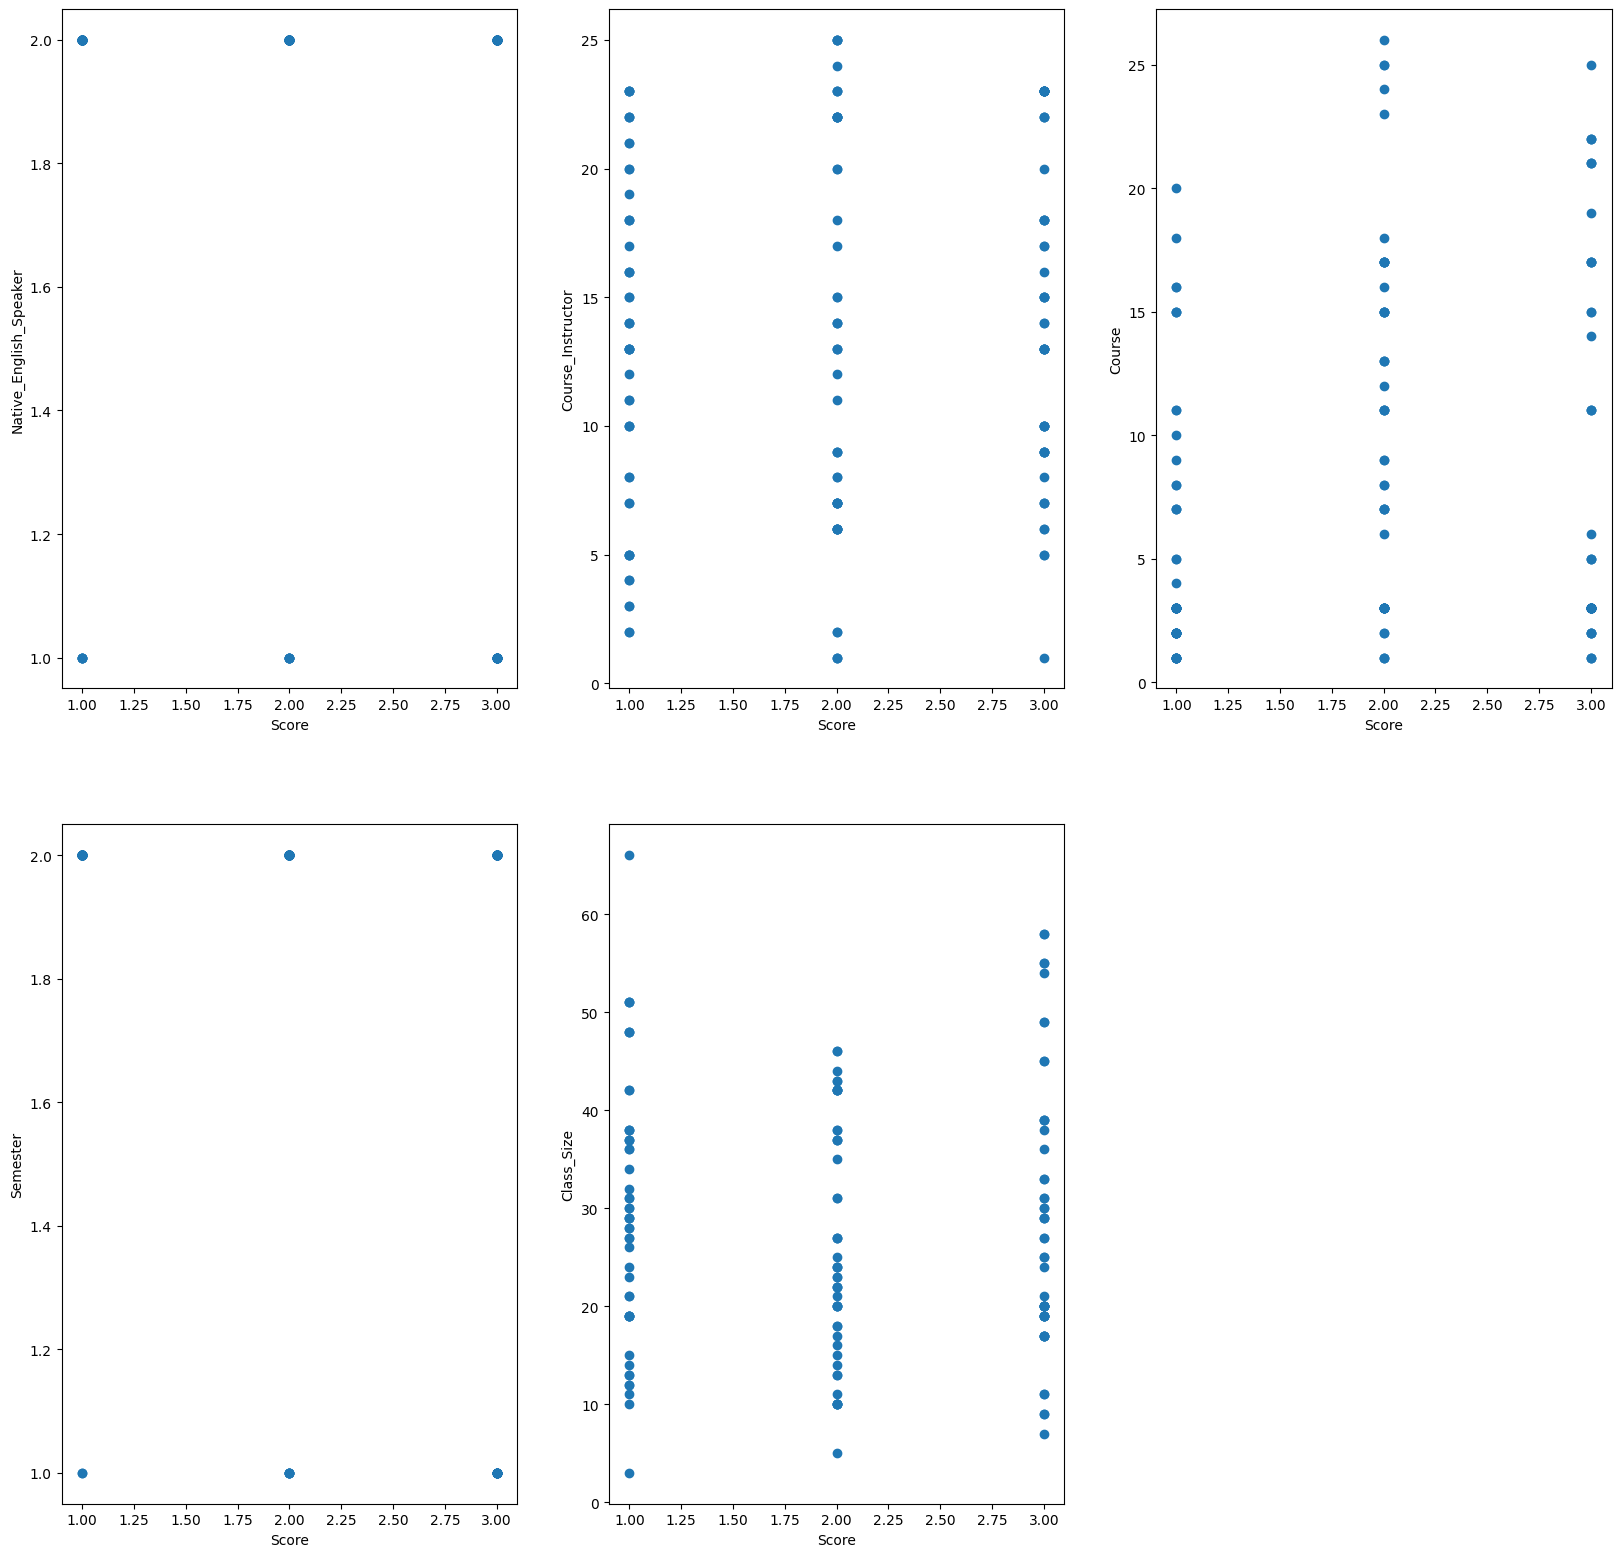

In [ ]:
# Define a function to plot the scatterplots of the relationships between all independent variables and the dependent
# variable
def plot_relationships(df, num_cols):
    variables = df.columns
    # This function assumes that the dependent variable is in the last column
    dep_var = variables[-1]
    print(dep_var)
    ind_var = variables[:-1]
    print(ind_var)
    figs = len(dep_var)
    print(figs)
    num_cols = num_cols
    num_rows = round(figs / num_cols) + 1
    fig = 1
    plt.figure(figsize=(20,30))
    # Loop through all independent variables and create the scatter plot
    for i in ind_var:
        pltfignums = [str(num_rows), str(num_cols), str(fig)]
        pltfig = int(''.join(pltfignums))
        plt.subplot(pltfig)
        plt.scatter(df[dep_var],df[i])
        plt.ylabel(str(i))
        plt.xlabel(str(dep_var))
        fig +=1

plot_relationships(df,num_cols=3)

<Axes: >

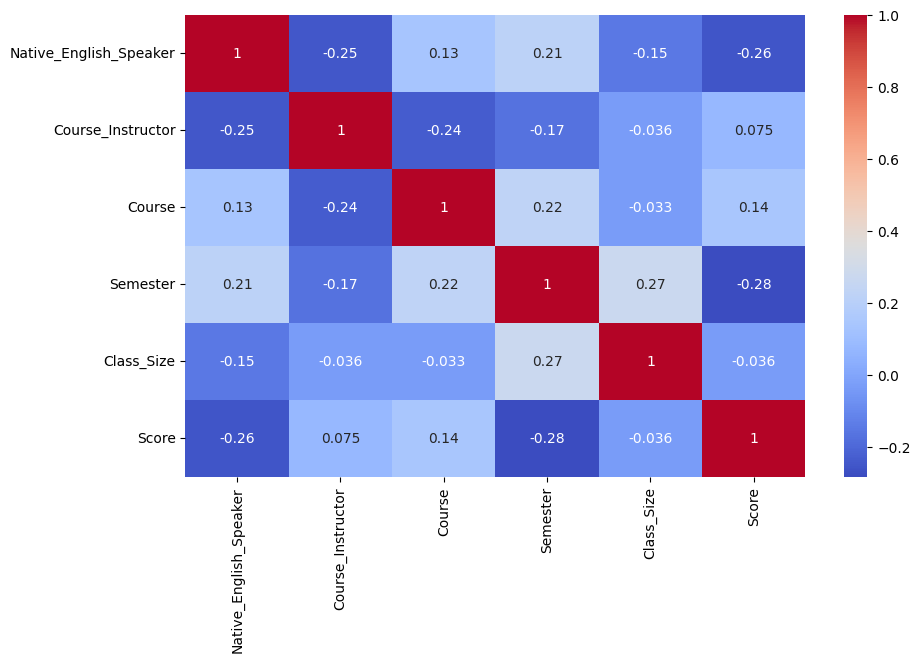

In [ ]:
# Inspect the correlations
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2g')

##Feature Selection using Lasso Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],
                                                              df['Score'],
                                                              test_size=0.2,
                                                              random_state=42)

Text(0, 0.5, 'Coefficients')

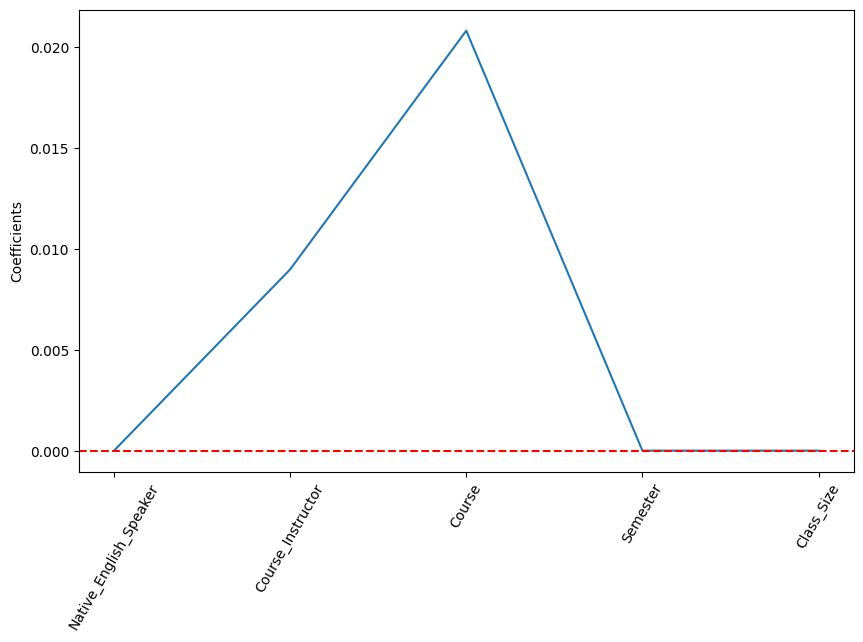

In [ ]:
lasso = Lasso(alpha=0.1)

# Fit the model to the training data
lasso.fit(X_train, y_train)

# Extract the coefficients
lasso_coef = lasso.coef_

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.plot(range(len(X_train.columns)), lasso_coef)
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=60)
plt.axhline(0.0, linestyle='--', color='r')
plt.ylabel('Coefficients')

## OneHotEncoder Approach

In [ ]:
# converting categorical variables to numerical variables using one-hot encoding
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output = False), [1, 2])], remainder='passthrough')
df = ct.fit_transform(df)



# converting to numpy array
df = np.array(df)


In [ ]:
# normalizing the numerical variables
sc = StandardScaler()
df[:, -2:-1] = sc.fit_transform(df[:, -2:-1])

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[:, :-1], df[:, -1], test_size=0.2, random_state=42)


## Label Encoder

In [ ]:
# # Encode categorical variables using label encoding
# le = LabelEncoder()
# df['Native_English_Speaker'] = le.fit_transform(df['Native_English_Speaker'])
# df['Course_Instructor'] = le.fit_transform(df['Course_Instructor'])
# df['Course'] = le.fit_transform(df['Course'])

# # Scale the numerical variables using min-max scaling
# scaler = MinMaxScaler()
# df['Class_Size'] = scaler.fit_transform(df[['Class_Size']])

# # Create new feature: semester_type
# df['Semester'] = df['Semester'].apply(lambda x: 'Summer' if x == 1 else 'Regular')

# # Encode semester_type using label encoding
# df['Semester'] = le.fit_transform(df['Semester'])

# # Split the data into training and testing sets
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Traning Decision Tree

In [ ]:
# training the model using Decision Tree
model1 = DecisionTreeClassifier()
model1.fit(X_train,y_train)

# testing the model
prediction = model1.predict(X_test)

# evaluating the performance of the model
print('Accuracy: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', confusion_matrix(y_test, prediction))
print('Classification Report: \n', classification_report(y_test, prediction))

Accuracy:  0.7419354838709677
Confusion Matrix: 
 [[10  1  0]
 [ 3  7  1]
 [ 1  2  6]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.71      0.91      0.80        11
         2.0       0.70      0.64      0.67        11
         3.0       0.86      0.67      0.75         9

    accuracy                           0.74        31
   macro avg       0.76      0.74      0.74        31
weighted avg       0.75      0.74      0.74        31



## Training Random Forest Classifer

In [ ]:
# training the model using Random Forest Classifier
model2 = RandomForestClassifier(random_state = 42)

model2.fit(X_train, y_train)

# testing the model
prediction = model2.predict(X_test)

# evaluating the performance of the model
print('Accuracy: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', confusion_matrix(y_test, prediction))
print('Classification Report: \n', classification_report(y_test, prediction))


Accuracy:  0.7096774193548387
Confusion Matrix: 
 [[10  1  0]
 [ 3  7  1]
 [ 2  2  5]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.67      0.91      0.77        11
         2.0       0.70      0.64      0.67        11
         3.0       0.83      0.56      0.67         9

    accuracy                           0.71        31
   macro avg       0.73      0.70      0.70        31
weighted avg       0.73      0.71      0.70        31



## Logistic Regression

In [ ]:
# training the model using LogisticRegression
model3 = LogisticRegression()
model3.fit(X_train, y_train)

# testing the model
prediction = model1.predict(X_test)

# evaluating the performance of the model
print('Accuracy: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', confusion_matrix(y_test, prediction))
print('Classification Report: \n', classification_report(y_test, prediction))


Accuracy:  0.7419354838709677
Confusion Matrix: 
 [[10  1  0]
 [ 3  7  1]
 [ 1  2  6]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.71      0.91      0.80        11
         2.0       0.70      0.64      0.67        11
         3.0       0.86      0.67      0.75         9

    accuracy                           0.74        31
   macro avg       0.76      0.74      0.74        31
weighted avg       0.75      0.74      0.74        31



##Training SVM

In [ ]:
model4 = svm.SVC()
model4.fit(X_train, y_train)

# testing the model
prediction = model1.predict(X_test)

# evaluating the performance of the model
print('Accuracy: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', confusion_matrix(y_test, prediction))
print('Classification Report: \n', classification_report(y_test, prediction))

Accuracy:  0.7419354838709677
Confusion Matrix: 
 [[10  1  0]
 [ 3  7  1]
 [ 1  2  6]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.71      0.91      0.80        11
         2.0       0.70      0.64      0.67        11
         3.0       0.86      0.67      0.75         9

    accuracy                           0.74        31
   macro avg       0.76      0.74      0.74        31
weighted avg       0.75      0.74      0.74        31



## Hyperparameter Tuning

In [ ]:
# Number of trees in Random Forest
rf_n_estimators = [int(x) for x in np.linspace(800, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)

# Maximum number of levels in tree
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
# Add the default as a possible value
rf_max_depth.append(None)

# Number of features to consider at every split
rf_max_features = ['auto', 'sqrt', 'log2']

# Criterion to split on
rf_criterion = ['gini', 'entropy', 'log_loss']

# Minimum number of samples required to split a node
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]

# Minimum decrease in impurity required for split to happen
rf_min_impurity_decrease = [0.0, 0.05, 0.1]

# Method of selecting samples for training each tree
rf_bootstrap = [True, False]

In [ ]:
# Create the grid
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

rf_grid

{'n_estimators': [800, 850, 900, 950, 1000, 1500, 2000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['gini', 'entropy', 'log_loss'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [ ]:
# Create the model to be tuned
rf_base = RandomForestClassifier()

# Create the random search Random Forest
rf_random = RandomizedSearchCV(estimator = rf_base, param_distributions = rf_grid,
                               n_iter = 100, cv = 5,verbose = 2, random_state = 42,
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print('Best Hyperparameters:', rf_random.best_params_)

# Make predictions on the testing set using the best estimator
y_pred_cv = rf_random.best_estimator_.predict(X_test)

# Evaluate the performance of the best estimator
print('Accuracy:', accuracy_score(y_test, y_pred_cv))
print('Classification Report:')
print(classification_report(y_test, y_pred_cv))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_cv))

## Final Model Evaluation

In [ ]:
BestHyperparameters= {'n_estimators': 900, 'min_samples_split': 2, 'min_impurity_decrease': 0.0, 'max_features': 'auto', 'max_depth': 55, 'criterion': 'gini', 'bootstrap': True}

In [ ]:
rf_final = RandomForestClassifier(n_estimators = 900,
                                 min_samples_split = 2,
                                 min_impurity_decrease = 0.0,
                                 max_depth = 55,
                                 criterion = 'gini',
                                 bootstrap = True,
                                 random_state = 42)

rf_final.fit(X_train, y_train)

# testing the model
prediction = rf_final.predict(X_test)



# evaluating the performance of the model
print('Accuracy: ', accuracy_score(y_test, prediction))
print('Confusion Matrix: \n', confusion_matrix(y_test, prediction))
print('Classification Report: \n', classification_report(y_test, prediction))

Accuracy:  0.7741935483870968
Confusion Matrix: 
 [[11  0  0]
 [ 3  8  0]
 [ 2  2  5]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.69      1.00      0.81        11
         2.0       0.80      0.73      0.76        11
         3.0       1.00      0.56      0.71         9

    accuracy                           0.77        31
   macro avg       0.83      0.76      0.76        31
weighted avg       0.82      0.77      0.77        31



##Save Model using Pickle for further evaluation

In [ ]:
import pickle
with open('/content/drive/MyDrive/models/model.pkl', 'wb') as f:
    pickle.dump(rf_final, f)